## Simple Linear Regression

# Que Salary_hike -> Build a prediction model for Salary_hike

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Importing Data

In [ ]:
salary_data = pd.read_csv('/content/Salary_Data.csv')
salary_data.head(6)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0


## Data understanding

In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [ ]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Check for the assumption compatibility


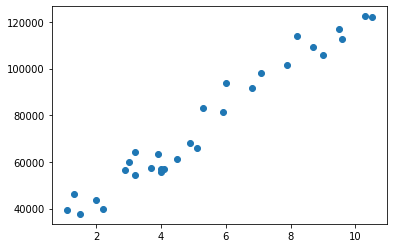

In [ ]:
plt.scatter(x='YearsExperience',y='Salary', data = salary_data)

In [ ]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


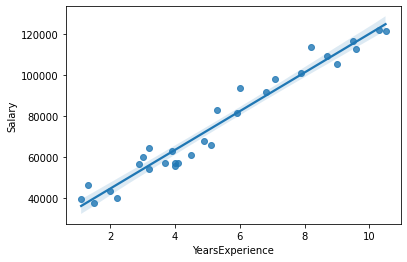

In [ ]:
sns.regplot(x='YearsExperience',y='Salary', data = salary_data)

## Data Preparation

In [ ]:
salary_data.head(6)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0


## Model Building and  Model Training

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
linear_model_salary = smf.ols(formula= 'Salary~YearsExperience',data= salary_data).fit()

## Check for the Deliverables

In [ ]:
linear_model_salary.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# strength of a hypothesis

In [ ]:
linear_model_salary.tvalues,linear_model_salary.pvalues 

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

### As P value is much lesser than alpha (0.05) we can say there is good co-realtion between variables

## Model Testing

In [ ]:
# If YearsExperience 1.1 & 2 then Salary = ?
# Y = mX + C
print(9449.962321*1.1+25792.200199)
print(9449.962321*1.5+25792.200199)

36187.158752100004
39967.1436805


## Machine Prediction

In [ ]:
pred_data = {'YearsExperience':[1.1,1.5,2.2,10.5,11,12.5]}
pred_data

{'YearsExperience': [1.1, 1.5, 2.2, 10.5, 11, 12.5]}

In [ ]:
test_data = pd.DataFrame(pred_data)
test_data

,YearsExperience
0,1.1
1,1.5
2,2.2
3,10.5
4,11.0
5,12.5


In [ ]:
linear_model_salary.predict(test_data)

0     36187.158752
1     39967.143681
2     46582.117306
3    125016.804574
4    129741.785735
5    143916.729217
dtype: float64

In [ ]:
test_data_a = pd.DataFrame(salary_data,columns=['YearsExperience'])
test_data_a.head(6)

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9


In [ ]:
linear_model_salary.predict(test_data_a)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

## Model Deployment

In [ ]:
from pickle import dump

In [ ]:
dump(linear_model_salary, open('linear_model_salary.pkl','wb'))

In [ ]:
from pickle import load

In [ ]:
linear_read_model = load(open('/content/linear_model_salary.pkl','rb'))

In [ ]:
linear_read_model.predict(test_data)

0    13.178814
1    31.318032
2    16.476853
3    19.774893
4    26.370973
dtype: float64